# Распределение значений датчиков в статике

Загружаем данные из файла метрик

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from loader import load_data_in_test_fomat as load_data 

df_white_forward_bend = load_data('./data/all_sensors_on_white_static_forward_bend.log')
mean_df_white_forward_bend = df_white_forward_bend.groupby("sensor",as_index=False).mean()

### Распределение значений от разных датчиков

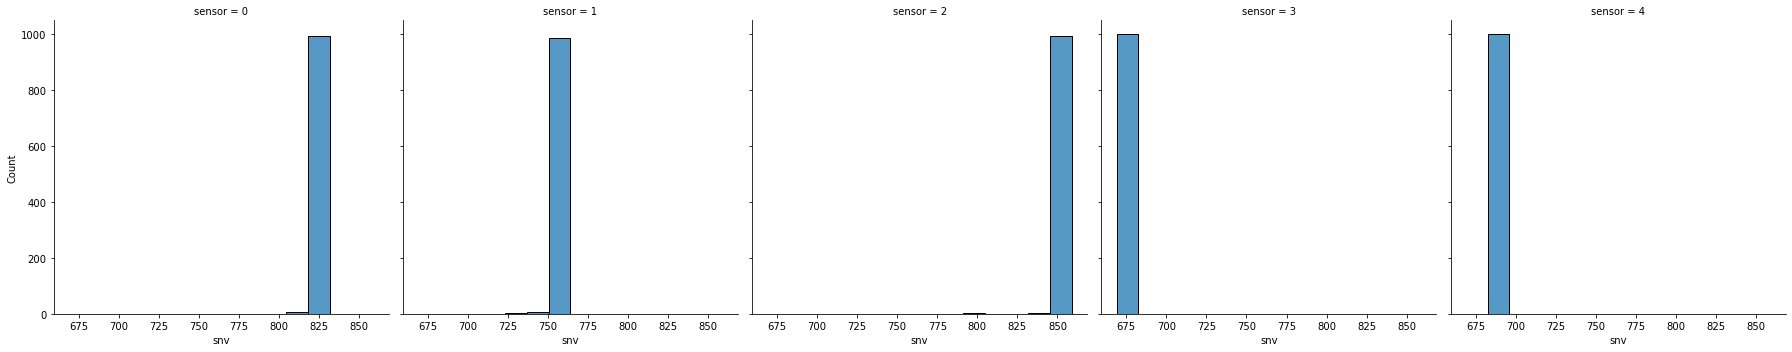

In [2]:
sns.displot(data=df_white_forward_bend, x="snv", col='sensor', multiple="stack",)
plt.tight_layout()

Видно, что у разных датчиков разные значения. Измерения одного датчика 

In [3]:
df_white_backward_bend = load_data('./data/all_sensors_on_white_static_backward_bend.log')
print(df_white_backward_bend)
mean_df_white_backward_bend = df_white_backward_bend.groupby("sensor",as_index=False).mean()

      snv  sensor
0     721       0
1     665       1
2     735       2
3     598       3
4     609       4
...   ...     ...
4995  722       0
4996  665       1
4997  736       2
4998  597       3
4999  609       4

[5000 rows x 2 columns]


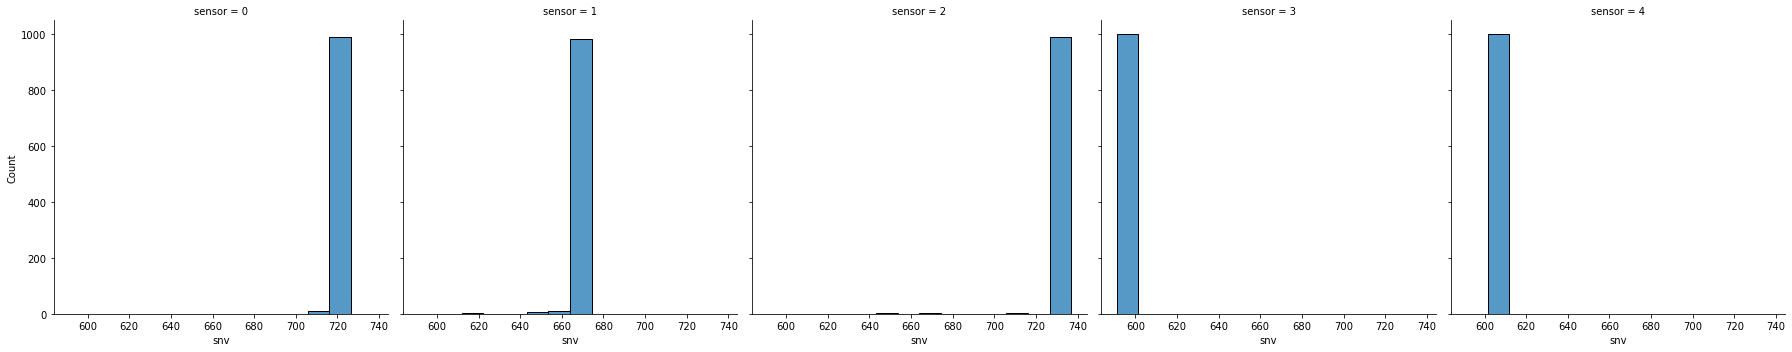

In [4]:
sns.displot(data=df_white_backward_bend, x="snv", col='sensor', multiple="stack",)
plt.tight_layout()

### Влияние наклона вперед/назад на значения датчиков

In [5]:
print(mean_df_white_forward_bend)
print(mean_df_white_backward_bend)

   sensor      snv
0       0  823.397
1       1  756.714
2       2  857.520
3       3  669.987
4       4  689.794
   sensor      snv
0       0  721.861
1       1  664.709
2       2  735.460
3       3  597.512
4       4  608.297


0    12.331354
1    12.158491
2    14.234070
3    10.817374
4    11.814687
Name: snv, dtype: float64

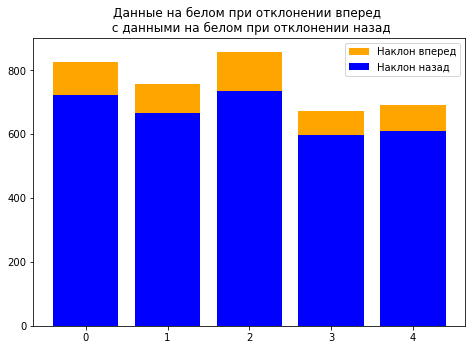

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mean_df_white_forward_bend["sensor"],mean_df_white_forward_bend["snv"], color = 'orange')
ax.bar(mean_df_white_backward_bend["sensor"],mean_df_white_backward_bend["snv"], color = 'blue')
ax.set_title("Данные на белом при отклонении вперед \n с данными на белом при отклонении назад")
ax.legend(['Наклон вперед','Наклон назад'],loc=1)

(mean_df_white_forward_bend["snv"]-mean_df_white_backward_bend["snv"])/mean_df_white_forward_bend["snv"]*100

При работе на белом фоне влияние значений отображено на графике и составляет порядка 10-14 процентов

0    16.472606
1    20.936856
2    28.318313
3     7.586138
4    22.678686
Name: snv, dtype: float64

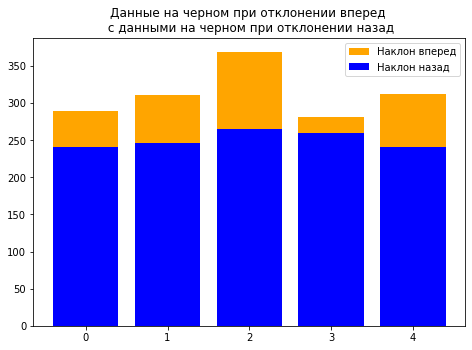

In [7]:
df_black_forward_bend = load_data('./data/all_sensors_on_black_static_forward_bend.log')
mean_df_black_forward_bend = df_black_forward_bend.groupby("sensor",as_index=False).mean()

df_black_backward_bend = load_data('./data/all_sensors_on_black_static_backward_bend.log')
mean_df_black_backward_bend = df_black_backward_bend.groupby("sensor",as_index=False).mean()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Данные на черном при отклонении вперед \n с данными на черном при отклонении назад")
ax.bar(mean_df_black_forward_bend["sensor"],mean_df_black_forward_bend["snv"], color = 'orange')
ax.bar(mean_df_black_backward_bend["sensor"],mean_df_black_backward_bend["snv"], color = 'blue')
ax.legend(['Наклон вперед','Наклон назад'],loc=1)

(mean_df_black_forward_bend["snv"]-mean_df_black_backward_bend["snv"])/mean_df_black_forward_bend["snv"]*100

Видно, что на черном влиение отклонения тоже сильное - от 7% до 28%

Сравним значения датчиков на белом и на черном

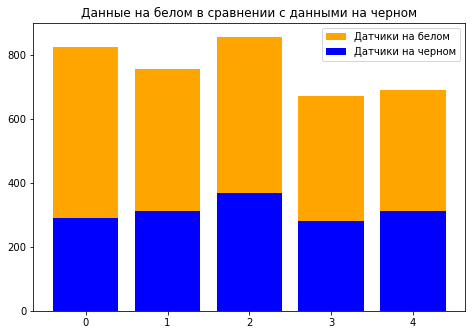

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Данные на белом в сравнении с данными на черном")
ax.bar(mean_df_white_forward_bend["sensor"],mean_df_white_forward_bend["snv"], color = 'orange')
ax.bar(mean_df_black_forward_bend["sensor"],mean_df_black_forward_bend["snv"], color = 'blue')
ax.legend(['Датчики на белом','Датчики на черном'],loc=1)
plt.show()

**Выводы:**

- Необходимо устранить колебания вперед/назад. 
- Необходимо выполнить калибровку датчиков для устранения разницы в передаваемых величинах 


### Без калибровки

1. Распределение показаний датчиков в статике на белом +
1. Распределение показаний датчиков в статике на белом в положении наклона впреред+
1. Распределение показаний датчиков в статике на белом в положении наклона назад+
1. Распределение показаний датчиков в статике на черном+
1. Распределение показаний датчиков в статике на черном в положении наклона впреред+
1. Распределение показаний датчиков в статике на черном в положении наклона назад+

## Реализация калибровки
### Замеры в статике для реализации калибровки

0    790.016
1    732.244
2    860.134
3    667.995
4    683.600
Name: snv, dtype: float64
746.7978


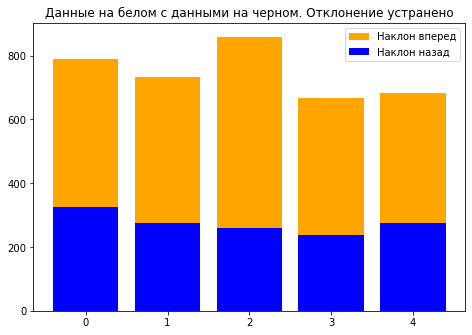

In [9]:
df_white = load_data('./data/all_sensors_on_white_static_bend_fixed.log')
mean_df_white = df_white.groupby("sensor",as_index=False).mean()

df_black = load_data('./data/all_sensors_on_black_static_bend_fixed.log')
mean_df_black = df_black.groupby("sensor",as_index=False).mean()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Данные на белом с данными на черном. Отклонение устранено")
ax.bar(mean_df_white["sensor"],mean_df_white["snv"], color = 'orange')
ax.bar(mean_df_black["sensor"],mean_df_black["snv"], color = 'blue')
ax.legend(['Наклон вперед','Наклон назад'],loc=1)

print (mean_df_white["snv"])
print (mean_df_white["snv"].mean())

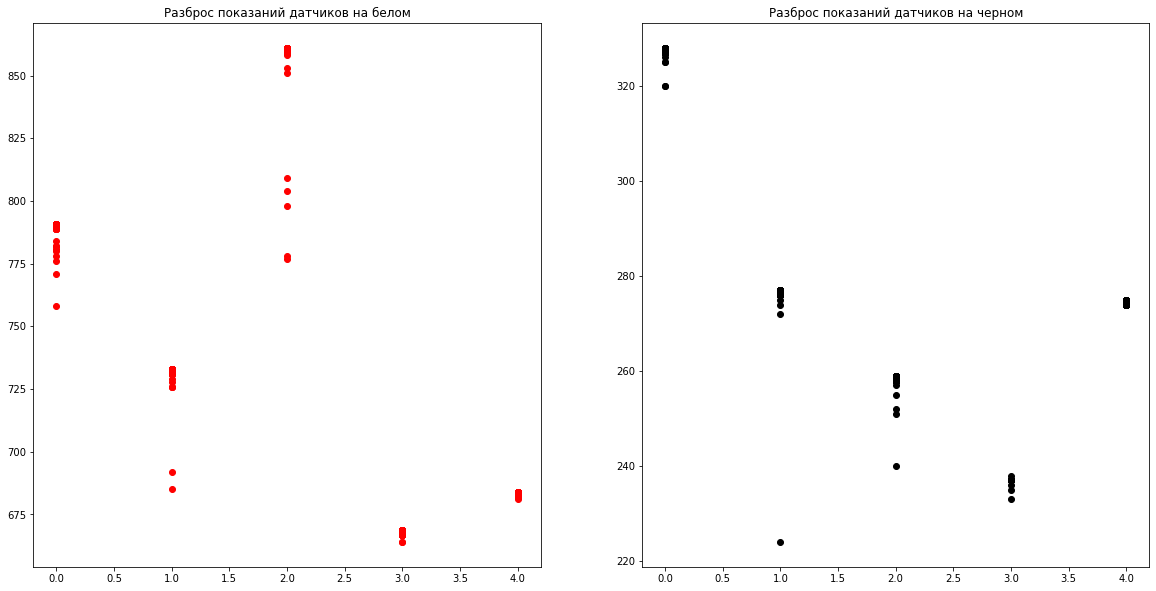

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey=False)
axs[0].set_title('Разброс показаний датчиков на белом')
axs[0].scatter(df_white["sensor"], df_white["snv"], c = ['red'])
axs[1].set_title('Разброс показаний датчиков на черном')
axs[1].scatter(df_black["sensor"], df_black["snv"], c = ['black'])
plt.show()

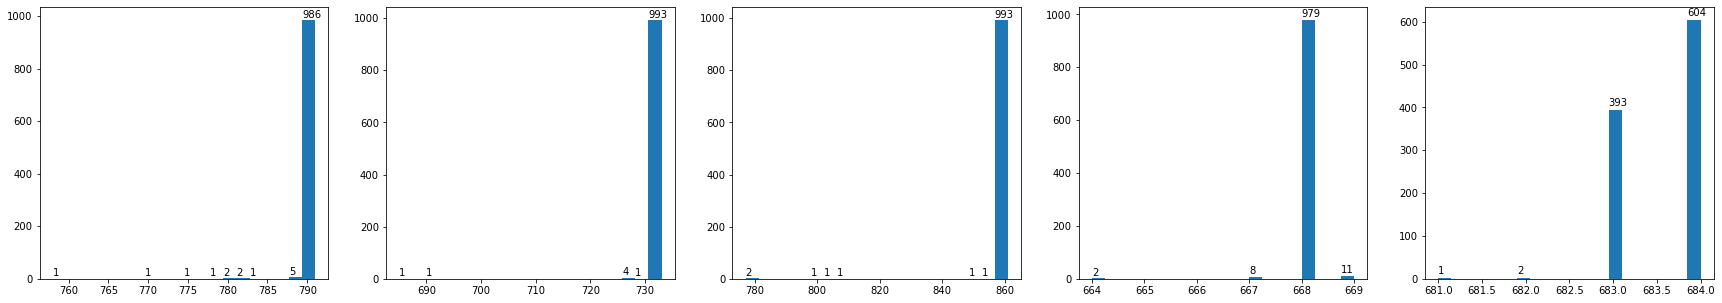

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(30, 5))
for axis_num in range(0,5):
    data = df_white[df_white['sensor']==axis_num]['snv']
    density, bins, _ = axs[axis_num].hist(data, bins = 20)
    count, _ = np.histogram(data, bins)
    for x,y,num in zip(bins, density, count):
        if num != 0:
            axs[axis_num].text(x, y+10, num, fontsize=10, rotation=0) # x,y,str
plt.show()


Видно, что есть незначительное количество измерений с значительным отклонением значения. Надо попробовать делать измерение на основе нескольких значений. Например на основе пяти. Из пяти отсеивать сильное отклонение. Надо подумать стоит ли делать изменения пачками или нет так как отдельные выбросы из-за инерционности не будут влиять

### Замеры в динамике для реализации калибровки

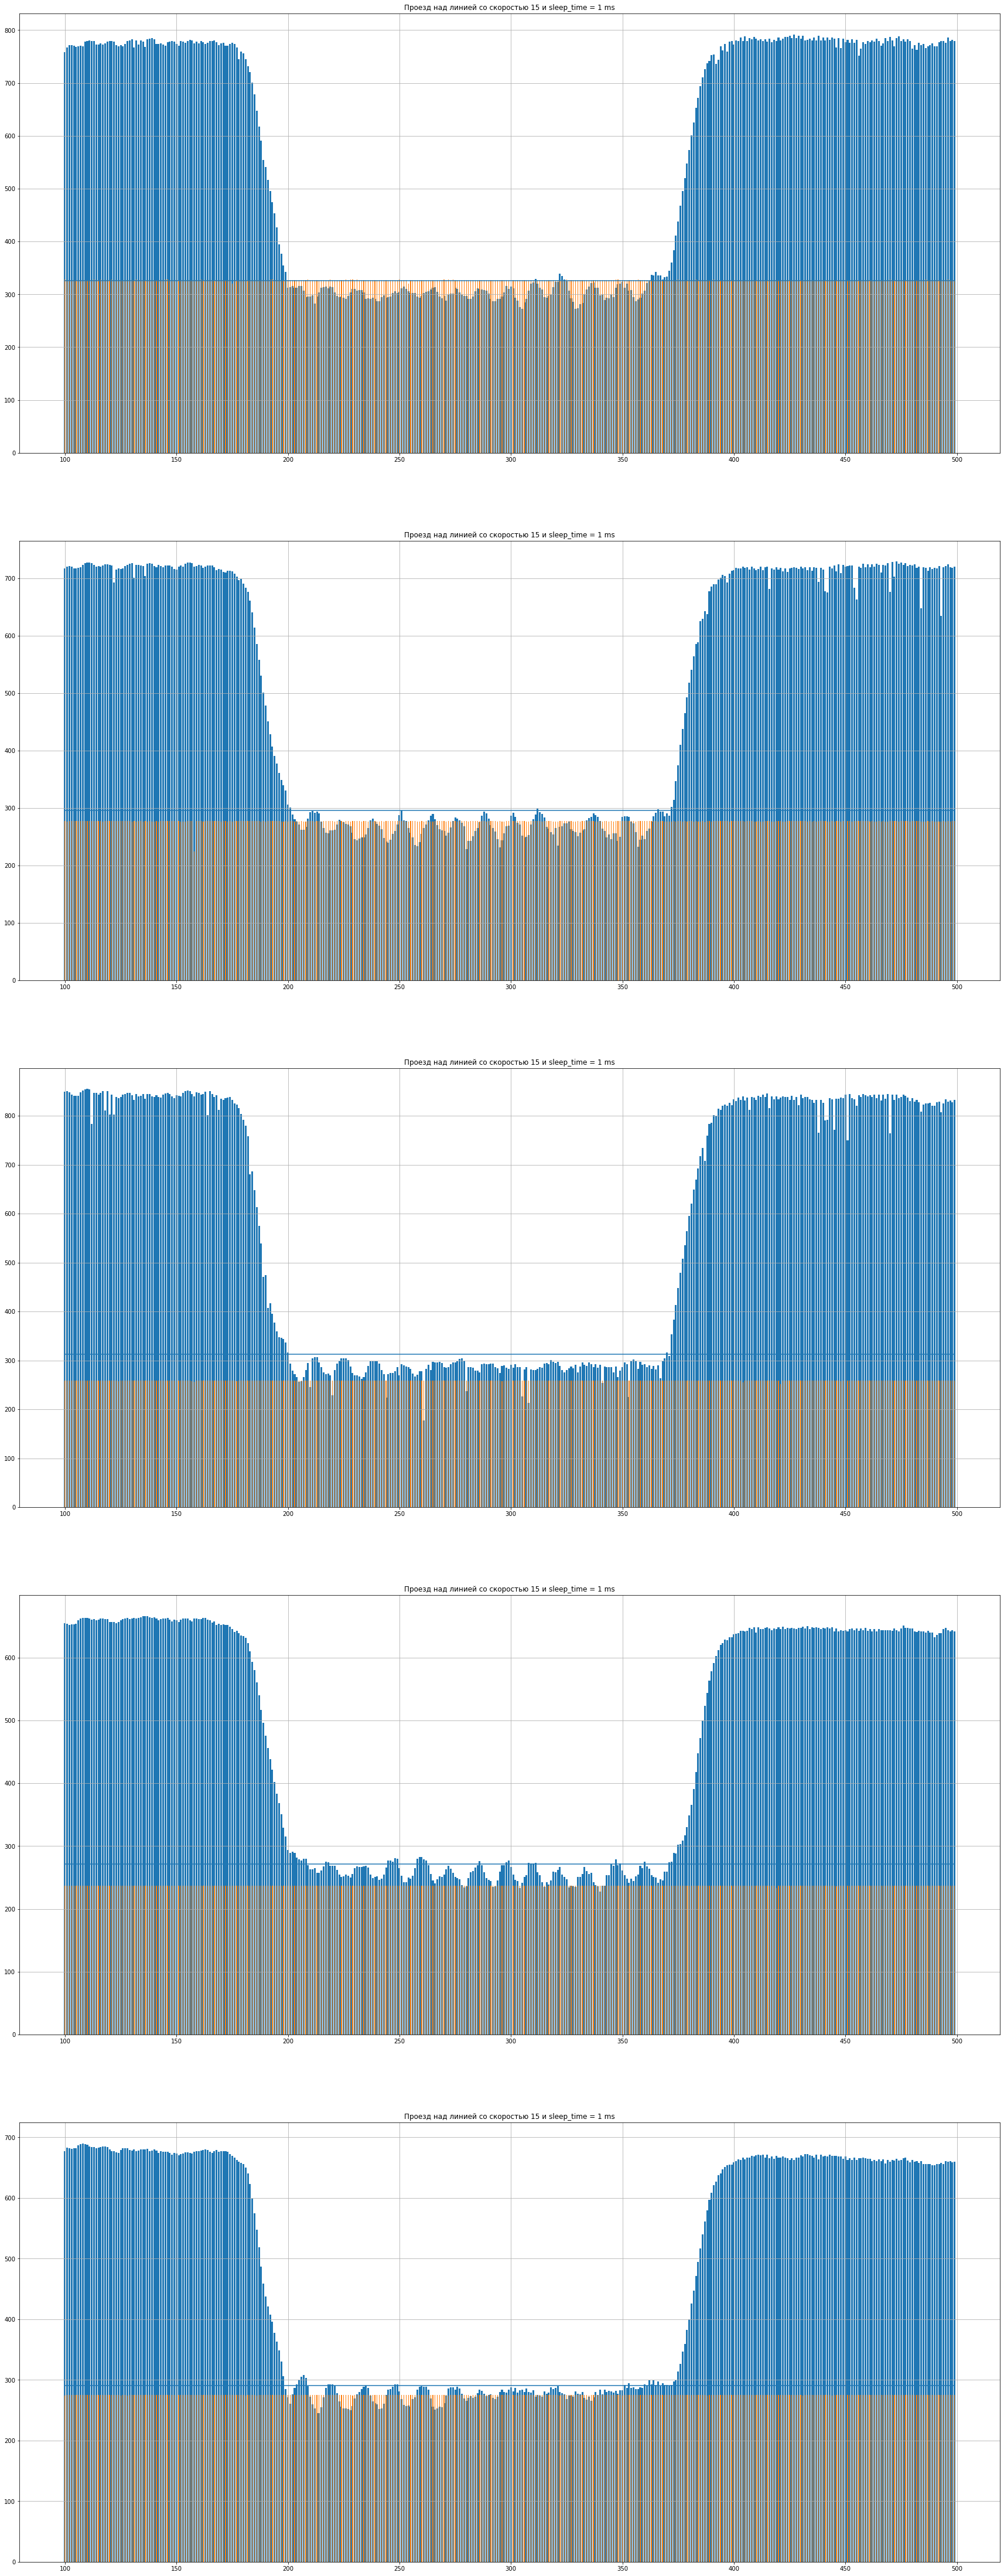

0.075

In [12]:
df_move_thow_line = load_data('./data/move_throw_line_14.log')

fig, axs = plt.subplots(5, 1, figsize=(30, 80))
for axis_num in range(0,5):
    data = df_move_thow_line[df_move_thow_line['sensor']==axis_num]['snv']
    hist = np.histogram(data, 30)
    hist[0][hist[0]<30]=0
    max_black_value = hist[1][np.nonzero(hist[0][:10])[0].max()+1]
    axs[axis_num].plot(np.arange(100,500,1), np.arange(100,500,1)*0 + max_black_value)
    axs[axis_num].set_title('Проезд над линией со скоростью 15 и sleep_time = 1 ms')
    axs[axis_num].bar(np.arange(100,500,1),data[100:500]) 
    data = df_black[df_black['sensor']==axis_num]['snv']
    axs[axis_num].bar(np.arange(100,500,1),data[100:500], 0.3)
    axs[axis_num].grid(True);
    
plt.show()

30/400

### Цели проведения калибровки 

* Калибровка фиксирует значение для белого цвета для каждого датчика
* Калибровка фиксирует значение для черного цвета для каждого датчика
* Калибровка фиксирует значение для границы для каждого датчика
* Калибровка устраняет разницу в показаниях датчиков


Алгоритм калибровки

- Ставим бота на линию чтобы все датчики были на черном поле
- Делаем движение вперед-назад оставаясь на черном.
- По каждому датчику делем соритивку и принимаем белым среднее от 


- Ставим бота на линию чтобы все датчики были на черном поле
- Запускаем вращение вокруг оси
- Делаем несколько оборотов при этом фиксируем все значения датчиков.
- По каждому датчику считаем гистограмму и получаем значение черного



### C калибровкой

1. Распределение показаний датчиков в статике на белом с калибровкой
1. Распределение показаний датчиков в статике на черном с калибровкой

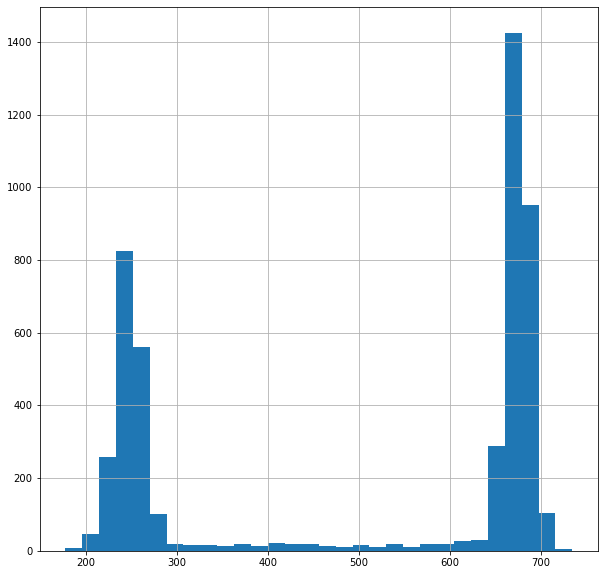

(array([   8,   45,  259,  824,  561,  100,   19,   16,   15,   14,   18,
         12,   21,   19,   19,   14,   10,   17,   11,   18,   11,   18,
         20,   27,   31,  289, 1424,  951,  104,    5]), array([177. , 195.6, 214.2, 232.8, 251.4, 270. , 288.6, 307.2, 325.8,
       344.4, 363. , 381.6, 400.2, 418.8, 437.4, 456. , 474.6, 493.2,
       511.8, 530.4, 549. , 567.6, 586.2, 604.8, 623.4, 642. , 660.6,
       679.2, 697.8, 716.4, 735. ]))
[   0    0    0    0    0    0 1424  951    0    0]
[177.  195.6 214.2 232.8 251.4 270.  288.6 307.2 325.8 344.4 363.  381.6
 400.2 418.8 437.4 456.  474.6 493.2 511.8 530.4 549.  567.6 586.2 604.8
 623.4 642.  660.6 679.2 697.8 716.4 735. ]
567.6


697.8000000000001

In [13]:
df_move_thow_line = load_data('./data/rotate_on_line.log')
fig, ax = plt.subplots(figsize=(10, 10))
data = df_move_thow_line[df_move_thow_line['sensor']==4]['snv']
ax.hist(data, bins = 30)
ax.grid(True);
plt.show()
hist = np.histogram(data, 30)

print (hist)
hist[0][hist[0]<len(data)*0.075]=0


print (hist[0][20:])
print (hist[1])
right_hist = hist[1][20:][1]
print (right_hist)
(hist[1][20:])[np.nonzero(hist[0][20:])[0].max()+1]

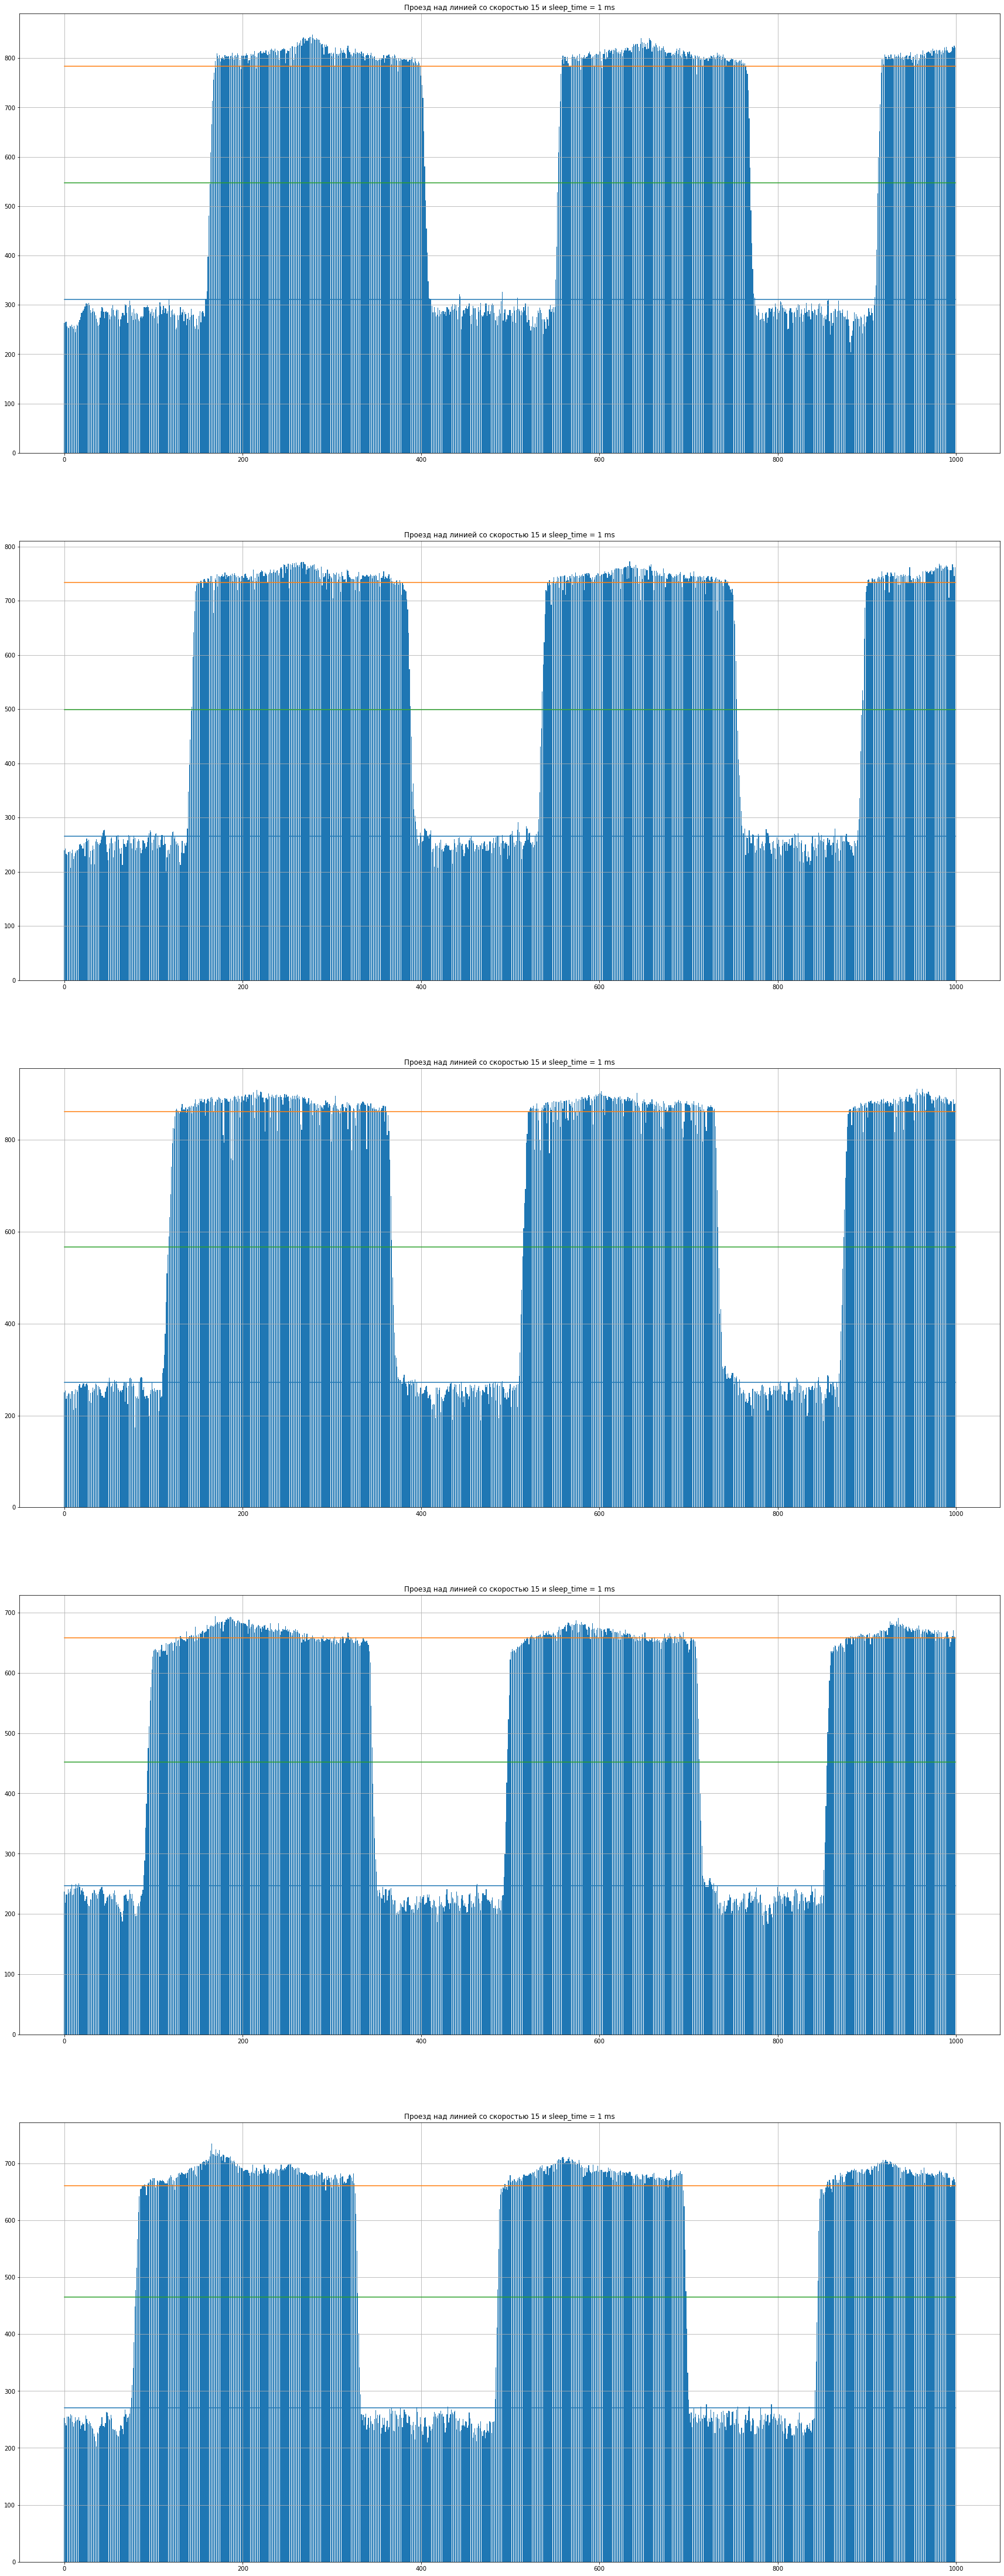

[311, 265, 272, 247, 270]
[783, 733, 861, 658, 660]
[547, 499, 567, 452, 465]
[472 468 589 411 390]


In [14]:
df_move_thow_line = load_data('./data/rotate_on_line.log')
min_count = 0
max_count = 1000
fig, axs = plt.subplots(5, 1, figsize=(30, 80))
black_values =[]
white_values = []
middle_values = []
for axis_num in range(0,5):
    # Получаем данные по всем датчикам
    data = df_move_thow_line[df_move_thow_line['sensor']==axis_num]['snv']
    # Стоим гистограмму на 30 позиций
    hist = np.histogram(data, 30)
    # Зануляем все значения, которых мало
    hist[0][hist[0]<len(data)*0.075]=0
    # Получаем индекс максимального ненулевого значения в левой части гистограммы
    max_nonzero_value_index = np.nonzero(hist[0][:10])[0].max()+1
    max_count_value_index = np.argmax(hist[0][20:])
    
    # Получаем значение черного для максимального индекса
    max_black_value = hist[1][max_nonzero_value_index]
    avg_white_value = (hist[1][20:])[max_count_value_index]
    middle_value = ((max_black_value+(avg_white_value-max_black_value)/2)).astype(int)
    
    axs[axis_num].plot(np.arange(min_count,max_count,1), np.arange(min_count,max_count,1)*0 + max_black_value)
    axs[axis_num].plot(np.arange(min_count,max_count,1), np.arange(min_count,max_count,1)*0 + avg_white_value)
    axs[axis_num].plot(np.arange(min_count,max_count,1), np.arange(min_count,max_count,1)*0 + middle_value)
    
    black_values.append(max_black_value.astype(int))
    white_values.append(avg_white_value.astype(int))
    middle_values.append(middle_value)
    
    axs[axis_num].set_title('Проезд над линией со скоростью 15 и sleep_time = 1 ms')
    axs[axis_num].bar(np.arange(min_count,max_count,1),data[min_count:max_count]) 
    data = df_black[df_black['sensor']==axis_num]['snv']
    axs[axis_num].grid(True);
    
plt.show()
print(black_values)
print(white_values)
print(middle_values)
working_range = np.subtract(white_values,black_values)
print(working_range)

Необходимо найти способ построить графики управляющего сигнала и скорости вращения моторов